# Titanic kaggle competition

## Data dictionary

| Variable   | Definition                        | Key                               |
|------------|----------------------------------|----------------------------------|
| survival   | Survival                          | 0 = No, 1 = Yes                  |
| pclass     | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd       |
| sex        | Sex                               |                                  |
| Age        | Age in years                      |                                  |
| sibsp      | # of siblings / spouses aboard    |                                  |
| parch      | # of parents / children aboard    |                                  |
| ticket     | Ticket number                     |                                  |
| fare       | Passenger fare                    |                                  |
| cabin      | Cabin number                      |                                  |
| embarked   | Port of Embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
pct_missing = train_df.isnull().sum()/len(train_df)*100
pct_missing.round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
# survival by ticket class
train_df.groupby(["Pclass"], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
# survival by sex
train_df.groupby(["Sex"], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
# survival by no. siblings/ spouses
train_df.groupby(["SibSp"], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# survival by no. parents
train_df.groupby(["Parch"], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
train_df["family_size"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["family_size"] = test_df["SibSp"] + test_df["Parch"] + 1

In [14]:
# survival by family size
train_df.groupby(["family_size"], as_index=False)['Survived'].mean()

,family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [16]:
family_map = {
    1: 'Alone',
    2: 'Small',
    3: 'Small',
    4: 'Small',
    5: 'Medium',
    6: 'Medium',
    7: 'Large',
    8: 'Large',
    11: 'Large'}
train_df['family_size_grouped'] = train_df['family_size'].map(family_map)
test_df['family_size_grouped'] = train_df['family_size'].map(family_map)

In [17]:
# survival by family size
train_df.groupby(["family_size_grouped"], as_index=False)['Survived'].mean()

,family_size_grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [18]:
# survival by embark location
train_df.groupby(["Embarked"], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


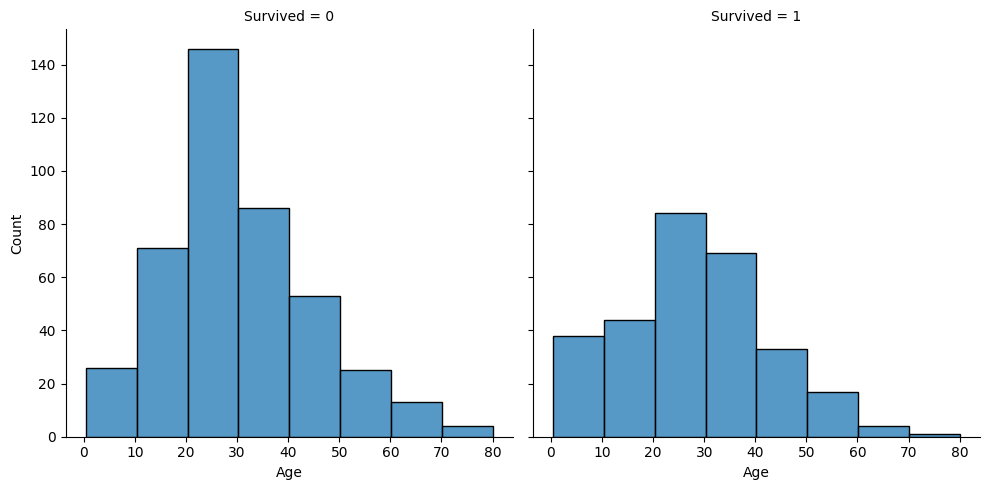

In [19]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)
plt.show()

In [20]:
train_df['age_cut'] = pd.qcut(train_df['Age'], 8)
test_df['age_cut'] = pd.qcut(test_df['Age'], 8)

In [46]:
 # survival by Age (cut)
train_df.groupby(["age_cut"], as_index=False, observed=True)['Survived'].mean()

,age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [30]:
bins = [0, 16, 20.125, 24, 28, 32.312, 38, 47, 80]
labels = [0,1,2,3,4,5,6,7]

train_df['age_group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=True)
test_df['age_group']  = pd.cut(test_df['Age'], bins=bins, labels=labels, right=True)

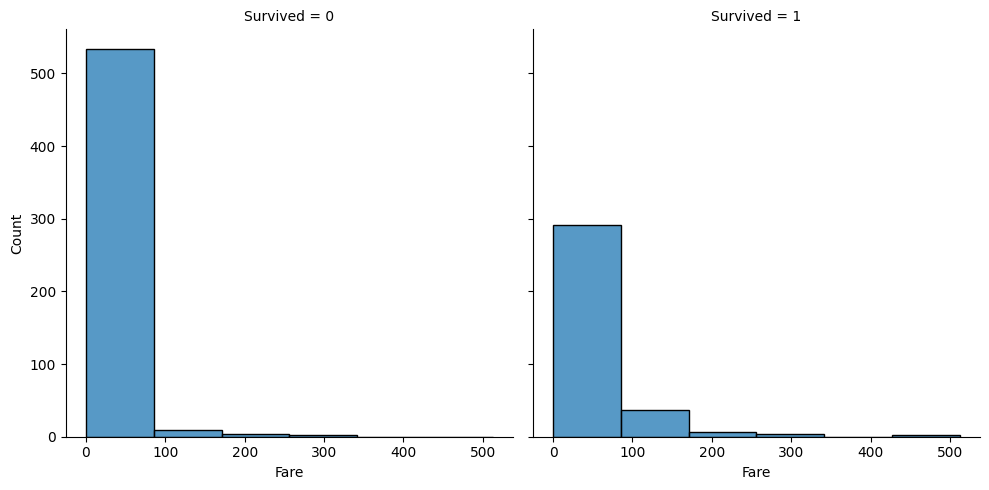

In [42]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)
plt.show()

In [45]:
train_df['fare_cut'] = pd.qcut(train_df['Fare'], 6)
test_df['fare_cut'] = pd.qcut(test_df['Fare'], 6)

In [47]:
 # survival by fare (cut)
train_df.groupby(["fare_cut"], as_index=False, observed=True)['Survived'].mean()

,fare_cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [ ]:
bins = [7.775, 8.662, 14.454, 26, 52.369, 32.312, 38, 47, 80]
labels = [0,1,2,3,4,5,6,7]

train_df['fare_group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=True)
test_df['fare_group']  = pd.cut(test_df['Age'], bins=bins, labels=labels, right=True)